In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [2]:
#load and review the data
df = pd.read_csv("C:/cindy/ICL/machine learning/loandata.csv")
df

,field,selectiveCollege,sex,Default,loanAmount,graduationYear
0,BUSINESS,0,Male,No,59265,2012
1,STEM,0,Female,No,74496,2011
2,STEM,0,Male,No,36667,2006
3,BUSINESS,0,Male,No,40551,2007
4,BUSINESS,1,Male,No,38566,2014
...,...,...,...,...,...,...
2015,HUMANITIES,1,Female,Yes,40396,2009
2016,STEM,0,Female,No,38055,2012
2017,STEM,0,Male,No,28557,2009
2018,HUMANITIES,0,Male,Yes,39013,2010


In [3]:
#convert categorical values to numerical values
df = pd.get_dummies(df, columns = None, dtype=float)

In [4]:
df

,selectiveCollege,loanAmount,graduationYear,field_BUSINESS,field_HUMANITIES,field_STEM,sex_Female,sex_Male,Default_No,Default_Yes
0,0,59265,2012,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0,74496,2011,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,0,36667,2006,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0,40551,2007,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1,38566,2014,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2015,1,40396,2009,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2016,0,38055,2012,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2017,0,28557,2009,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2018,0,39013,2010,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [5]:
#shuffle the data
df = df.sample(frac = 1)
#split it to X and Y
x = df.iloc[:, :8]
y = df['Default_Yes']

In [6]:
x

,selectiveCollege,loanAmount,graduationYear,field_BUSINESS,field_HUMANITIES,field_STEM,sex_Female,sex_Male
1537,0,66638,2013,0.0,0.0,1.0,0.0,1.0
1653,0,43205,2014,0.0,0.0,1.0,1.0,0.0
773,0,44752,2011,0.0,0.0,1.0,0.0,1.0
407,0,57573,2013,0.0,0.0,1.0,0.0,1.0
448,0,31722,2012,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
1588,0,40042,2012,0.0,0.0,1.0,0.0,1.0
1284,0,44475,2012,0.0,0.0,1.0,1.0,0.0
1764,0,42181,2015,0.0,1.0,0.0,1.0,0.0
1229,0,46911,2013,1.0,0.0,0.0,0.0,1.0


In [7]:
#split the data to 60% training, 30% validation, 10% test
#2020*0.6 = 1212, 2020*0.9 = 1818
x_train = x.iloc[:1212, :]
y_train = y[:1212]
x_valid = x.iloc[1212:1818, :]
y_valid = y[1212:1818]
x_test = x.iloc[1818:, :]
y_test = y[1818:]

In [8]:
#review the data after splitting 
x_train

,selectiveCollege,loanAmount,graduationYear,field_BUSINESS,field_HUMANITIES,field_STEM,sex_Female,sex_Male
1537,0,66638,2013,0.0,0.0,1.0,0.0,1.0
1653,0,43205,2014,0.0,0.0,1.0,1.0,0.0
773,0,44752,2011,0.0,0.0,1.0,0.0,1.0
407,0,57573,2013,0.0,0.0,1.0,0.0,1.0
448,0,31722,2012,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
535,0,46149,2011,0.0,0.0,1.0,0.0,1.0
83,1,37364,2005,1.0,0.0,0.0,0.0,1.0
1457,0,43167,2010,0.0,0.0,1.0,0.0,1.0
1286,0,77334,2006,0.0,0.0,1.0,1.0,0.0


## Naive Model

In [9]:
# Find the majority class in the training set
majority = y_train.mode()

# Predict the majority class for all validation set instances
naive_pred = [majority]*len(y_valid)
#df_pred.loc[:,"prediction"] = majority

# Calculate the accuracy of the naive predictions
naive_accuracy = accuracy_score(y_valid, naive_pred)
print('Naive Accuracy: ', naive_accuracy)

Naive Accuracy:  0.7739273927392739


## Decision Tree

In [10]:
# tree-based models are not based on the distance where features have an effect on one another. 
# Gini index and Entropy are both used to calculate information gain, therefore normalization is not required.

In [11]:
# Function to experiment with different depths of the decision tree
def experiment_with_depths(max_depth_range):
    #create empty list to store training and validation accuracies
    train_accuracies = []
    val_accuracies = []
    test_accuracies = []
    
    #interate through different depth range. Create a tree for each depth
    for depth in max_depth_range:
        # Train the model with specified max_depth
        tree_classifier = DecisionTreeClassifier(max_depth=depth, random_state=42)
        tree_classifier.fit(x_train, y_train)

        # Calculate accuracy on training, validation, and test sets
        train_accuracies.append(accuracy_score(y_train, tree_classifier.predict(x_train)))
        val_accuracies.append(accuracy_score(y_valid, tree_classifier.predict(x_valid)))
        test_accuracies.append(accuracy_score(y_test, tree_classifier.predict(x_test)))

    # Summarize the results in a DataFrame
    return pd.DataFrame({
        'Max Depth': max_depth_range,
        'Training Accuracy': train_accuracies,
        'Validation Accuracy': val_accuracies, 
        'Test Accuracy': test_accuracies
    })

# Experiment with depths from 1 to 20
depth_accuracy_summary = experiment_with_depths(range(1, 21))

# Display the summary of results
depth_accuracy_summary

,Max Depth,Training Accuracy,Validation Accuracy,Test Accuracy
0,1,0.834158,0.816832,0.831683
1,2,0.867987,0.838284,0.841584
2,3,0.878713,0.851485,0.856436
3,4,0.883663,0.836634,0.846535
4,5,0.891089,0.841584,0.836634
5,6,0.903465,0.838284,0.826733
6,7,0.914191,0.843234,0.821782
7,8,0.933993,0.830033,0.821782
8,9,0.950495,0.826733,0.831683
9,10,0.963696,0.823432,0.821782


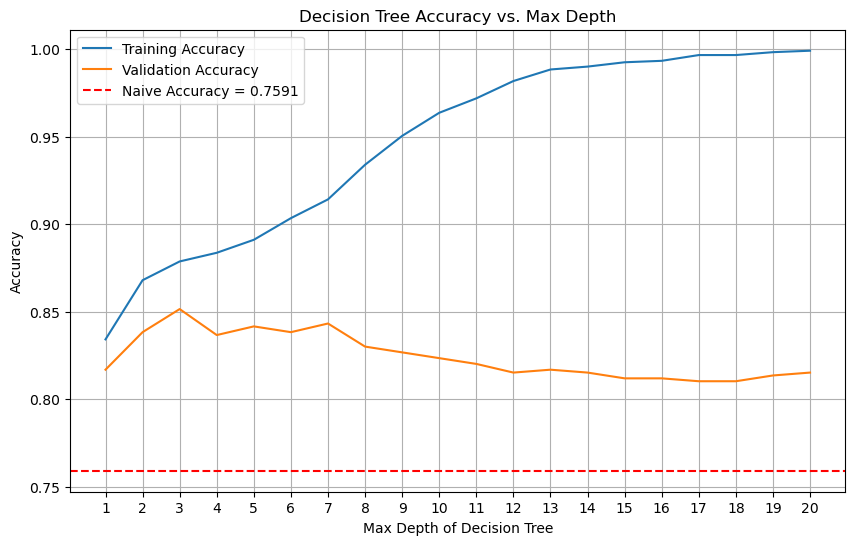

In [12]:
# Plot a line chart to show accuracies across different trees (each with different depth)
plt.figure(figsize=(10, 6))
plt.plot(depth_accuracy_summary['Max Depth'], depth_accuracy_summary['Training Accuracy'], label='Training Accuracy')
plt.plot(depth_accuracy_summary['Max Depth'], depth_accuracy_summary['Validation Accuracy'], label='Validation Accuracy')

# Add a horizontal line for naive accuracy
naive_accuracy = 0.759075907590759
plt.axhline(y=naive_accuracy, color='r', linestyle='--', label=f'Naive Accuracy = {round(naive_accuracy, 4)}')

# Show the max depth on the x-axis
plt.xticks(np.arange(min(depth_accuracy_summary['Max Depth']), max(depth_accuracy_summary['Max Depth'])+1, 1.0))

# Add labels, title, and styles
plt.xlabel('Max Depth of Decision Tree')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs. Max Depth')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
# Print the deicsion tree with the highest validation accuracy
best_tree = depth_accuracy_summary[depth_accuracy_summary["Validation Accuracy"] == depth_accuracy_summary["Validation Accuracy"].max()]
print("Best depth for the decision tree: ", set(best_tree["Max Depth"]))
print("Validation Accuracy = ", float(best_tree["Validation Accuracy"].iloc[0]))

Best depth for the decision tree:  {3}
Validation Accuracy =  0.8514851485148515


Classifiers with depth = 3 yield the highest validation accuracies (0.8515) than other classifiers and the Naive classifier. The classifier has a test accuracy of 0.8564. 

## Random Forest Model

In [14]:
import time

In [15]:
# Define a range for n_estimators. 
# n_estimators parameters in RandomForestClassifier refers to the number of trees in the forest
n_estimators_range = [5, 10, 20, 30, 50, 80, 100, 200, 300]
# Create empty lists to store accuracies and training times
train_accuracies_rf = []
val_accuracies_rf = []
test_accuracies_rf = []
gen_errors_rf = []
training_times = []

# Iterate different n_estimators
for n in n_estimators_range:
    start_time = time.time()  # Start timing
    # Set up the random forest model with each n_estimators
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    # Train the random forest model
    rf.fit(x_train, y_train)
    
    # Calculate and store the training and validation accuracies
    train_accuracies_rf.append(accuracy_score(y_train, rf.predict(x_train)))
    val_accuracies_rf.append(accuracy_score(y_valid, rf.predict(x_valid)))
    test_accuracies_rf.append(accuracy_score(y_test, rf.predict(x_test)))
    # Calculate generalisation error  = 1 - test accuracy
    gen_error = 1 - accuracy_score(y_test, rf.predict(x_test))
    gen_errors_rf.append(gen_error)
    
    end_time = time.time()  # End timing
    training_times.append(end_time - start_time)  # Calculate and store training time

In [16]:
# Print the accuracies of the random forest models 
forest_data = {'n_estimators': n_estimators_range,
        'Validation Accuracies': val_accuracies_rf,
       'Training Accuracies': train_accuracies_rf, 
        'Training Time': training_times,
        'Test Accuracies': test_accuracies_rf,
        'Generalisation Error': gen_errors_rf}
forest_summary = pd.DataFrame(forest_data)
forest_summary

,n_estimators,Validation Accuracies,Training Accuracies,Training Time,Test Accuracies,Generalisation Error
0,5,0.830033,0.976073,0.061525,0.841584,0.158416
1,10,0.826733,0.979373,0.086841,0.846535,0.153465
2,20,0.825083,0.988449,0.133959,0.851485,0.148515
3,30,0.823432,0.992574,0.194902,0.846535,0.153465
4,50,0.821782,0.995875,0.318582,0.841584,0.158416
5,80,0.821782,0.998350,0.546846,0.846535,0.153465
6,100,0.818482,0.999175,0.585335,0.846535,0.153465
7,200,0.815182,1.000000,1.170543,0.846535,0.153465
8,300,0.820132,1.000000,1.786359,0.846535,0.153465


In [17]:
# Print the random forest model with the highest validation accuracy
best_n_estimator = set(forest_summary[forest_summary['Validation Accuracies'] == forest_summary['Validation Accuracies'].max()]['n_estimators'])
print(f"The random forest model with {best_n_estimator} estimators has the highest validation accuracy = {forest_summary['Validation Accuracies'].max()}")

The random forest model with {5} estimators has the highest validation accuracy = 0.83003300330033


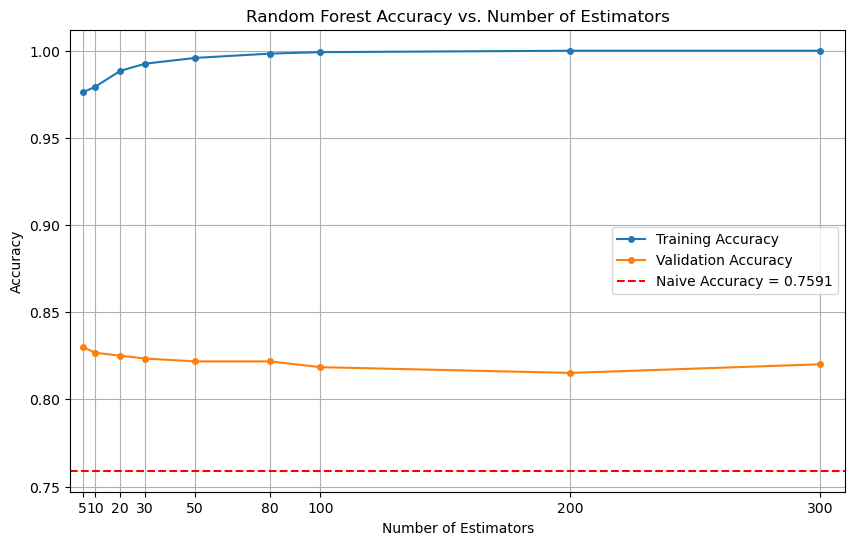

In [18]:
# Plot a line chart showing the accuracies across models with different n_estimators (number of trees in the forest)
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_accuracies_rf, label='Training Accuracy', marker='o', markersize=4)
plt.plot(n_estimators_range, val_accuracies_rf, label='Validation Accuracy', marker='o', markersize=4)
# Add a line to show the naive accuracy
plt.axhline(y=naive_accuracy, color='r', linestyle='--', label=f'Naive Accuracy = {round(naive_accuracy,4)}')
# Adjust titles and stylings
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy vs. Number of Estimators')
plt.xticks(n_estimators_range)
plt.xlim(0, 310)
plt.legend()
plt.grid(True)
plt.show()

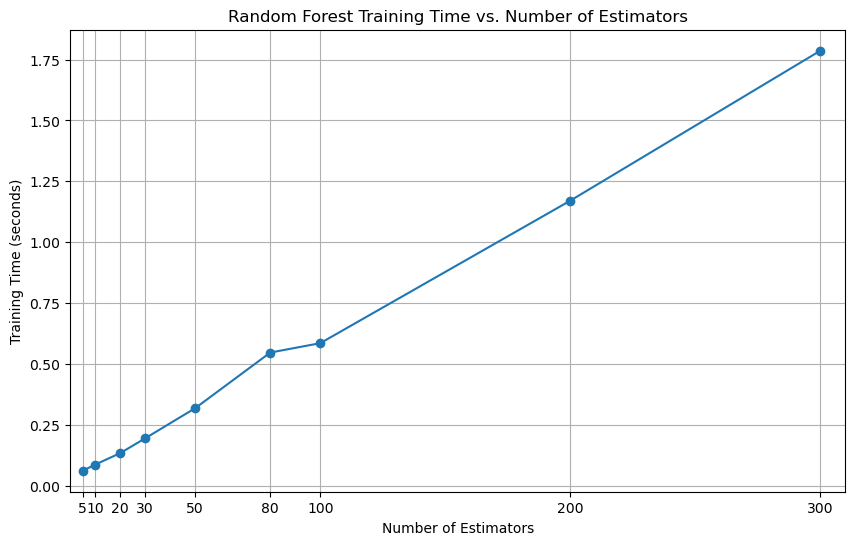

In [19]:
# Plot a line chart showing the trianing time across models with different n_estimators (number of trees in the forest)
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, training_times, marker='o', linestyle='-')
plt.xlim(0, 310)
plt.xlabel('Number of Estimators')
plt.ylabel('Training Time (seconds)')
plt.title('Random Forest Training Time vs. Number of Estimators')
plt.xticks(n_estimators_range)
plt.grid(True)
plt.show()

To select the best random forest model, we should consider the following aspects: 
- **Accuracy**: Generally, more trees in the forest can lead to better model performance, up to a point. However, the marginal increase of performance (marginal increase in validation accuracy) can diminish and eventually reach a plateau as the number of trees increases. From the graph 'Random Forest Accuracy vs. Number of Estimators' we can infer that the plateau was reached at a very early point when number of estimators = 5. The accuracies don't change much when increasing the number of estimators, so we should select a model whose number of estimators is not too far from 5. 

- **Training Time**: More trees also mean longer training times. Depending on the application, the marginal accuracy gains from adding more trees may not justify the increased computational cost. Judging from the constant slope in the above graph, we can infer that the marginal computational costs for different number of estimators remain roughly constant. The increase in number of estimators results in proportional increase in training time. Therefore, we can rely on validation accuracies to as the primary criteria to select the best model. 

- **Overfitting**: Random forests are less prone to overfitting with more trees. However, from the validation and training accuracies table and the first graph, it's found that starting from n_estimator >= 50, the training accuracies of the random forest models are roughly 1 while the validation accuracies remain stable. This indicates overfitting issues in these models. Thus, We should not choose a model with n_estimator >= 50.  

Based on the above, we should select the **random forest model with n_estimators = 5**, given that it has a high validation accuracy relative to most models, requires less training time, and avoids overfitting. 

It is worth mentioning that tree-based models are sensitive to changes in training data. In each shuffle, the results of decision tree and random forest may vary widely, so as their accuracies and training time. Hence, the best decision tree and random forest models can be different in each shuffle.